Project redo from scratch

title and what question should we do from analysis. I was thinking we could maybe use rank to determine prize money won.

In [13]:
library(tidyverse)
library(tidymodels)

In [14]:
#read in the tennis data from the web
tennis <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS") 
    
#show raw data
tennis_show_rawdata <- slice(tennis, 1:10)
tennis_show_rawdata


Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,25 (29-07-1994),Uzbekistan,Right-handed,Wikipedia,417 (81),253 (17-07-2017),Sanjar Fayziev,Two-handed,"$122,734",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In this data set there are 500 rows in total

In the next code cell we are removing excess data from the rows in the dataset.

In [98]:
#replaces the spaces in the column names with "."
names(tennis)<-make.names(names(tennis),unique = TRUE)

#Isolate the dollar amount from the Prize.Money column (US$ 18,879,855  24th all-time leader in earnings) -> (US$ 18,879,855)
tennis_fix_prize_money <- mutate(tennis, Prize.Money = str_extract(tennis$Prize.Money, "(\\$\\s?(\\d\\d?\\d?)(,\\d\\d\\d)*(\\.\\d\\d)?)"))

#Remove the currency and commas (US$ 18,879,855) -> 18870855 (numeric)
tennis_fix_prize_money <- mutate(tennis_fix_prize_money, Prize.Money = as.numeric((gsub("\\D+","", tennis_fix_prize_money$Prize.Money))))

#Remove the data from the Age column (26 (25-04-1993)) -> 26 (numeric)
tennis_clean_money <- mutate(tennis_fix_prize_money, Age = as.numeric((gsub("\\([^)]*\\)","", tennis_fix_prize_money$Age)))) 

#Remove numbers in brackets from Current Rank
tennis_clean_current_rank <-mutate(tennis_clean_money, Current.Rank = as.numeric ((gsub("\\([^)]*\\)","", tennis_clean_money$Current.Rank)))) 

#Remove numbers in brackets from Best Rank
tennis_fix_best_rank <- mutate(tennis_clean_current_rank, Best.Rank = as.numeric ((gsub("\\([^)]*\\)","", tennis_clean_current_rank$Current.Rank)))) 

#Remove columns like Facebook and Twitter and Nicknames as they can't be used to extrapolate data
#other columns being removed do not have a lot of data in them for players
#this means we can't use those columns to make predictions
#X1 is being removed as it was there to show entry of data and how many rows there are in the data set in the original excel file
#remove any rows that contain NA
tennis_remove_rows <- tennis_fix_best_rank %>%
    select(-Favorite.Surface,
           -Turned.Pro,  
           -Last.Appearance, 
           -Best.Elo.Rank, 
           -Peak.Elo.Rating, 
           -Titles, 
           -GOAT.Rank, 
           -Best.Season, 
           -Masters, 
           -Birthplace, 
           -Residence, 
           -Weight, 
           -Coach, 
           -Facebook, 
           -Twitter, 
           -Nicknames, 
           -Grand.Slams, 
           -Davis.Cups, 
           -Web.Site, 
           -Team.Cups, 
           -Olympics, 
           -Weeks.at.No..1, 
           -Tour.Finals,
           -X1, 
           -Current.Elo.Rank, 
           -Backhand, 
           -Plays, 
           -Wikipedia, 
           -Name, 
           -Active, 
           -Height, 
           -Retired) 



tennis_clean <- mutate(tennis_remove_rows, Country = as.factor(Country)) %>%
select(Age:Seasons) %>%
na.omit()

tennis_clean_show <- tennis_clean %>%
    slice(1:10)
tennis_clean_show
    

Age,Country,Current.Rank,Best.Rank,Prize.Money,Seasons
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
32,Slovakia,178,178,3261567,14
21,"Korea, Republic of",236,236,374093,2
27,Australia,183,183,6091971,11
22,Poland,31,31,1517157,5
28,United States,307,307,278709,1
21,"Taiwan, Province of China",232,232,59123,1
25,Uzbekistan,417,417,122734,5
20,Finland,104,104,74927,3
19,Canada,22,22,1893476,3


In the next cell, the numerical columns are scaled.
The data is also split into training and testing data
We are testing to see which variables impact prize money so strata will be set to Prize.Money

In [99]:
#split data into testing and training
tennis_split <- initial_split(tennis_clean, prop = 0.75, strata = Prize.Money)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)

#scale data in recipe

tennis_recipe <- recipe(Prize.Money ~. , data = tennis_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())



In the next cells we perform exploratory analysis to see what factor might directly influence prize money won

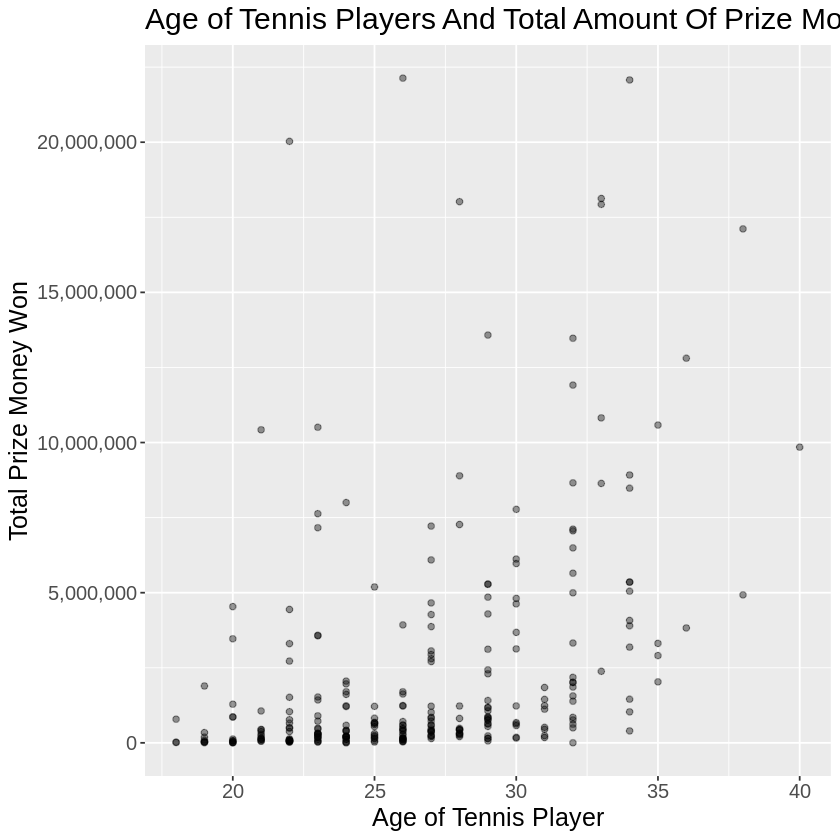

In [100]:
#outliers removed 
tennis_graph <- tennis_train %>%
    filter(Prize.Money < 50000000)

tennis_explore_age <- ggplot(tennis_graph, aes(x = Age, y = Prize.Money))+
geom_point(alpha = 0.4)+
labs(x = "Age of Tennis Player",
     y = "Total Prize Money Won", 
     title = "Age of Tennis Players And Total Amount Of Prize Money Won")+
scale_y_continuous(labels = scales::comma)+
theme(text = element_text(size=15))
tennis_explore_age

This factor does not seem to have a strong relationship with prize money.

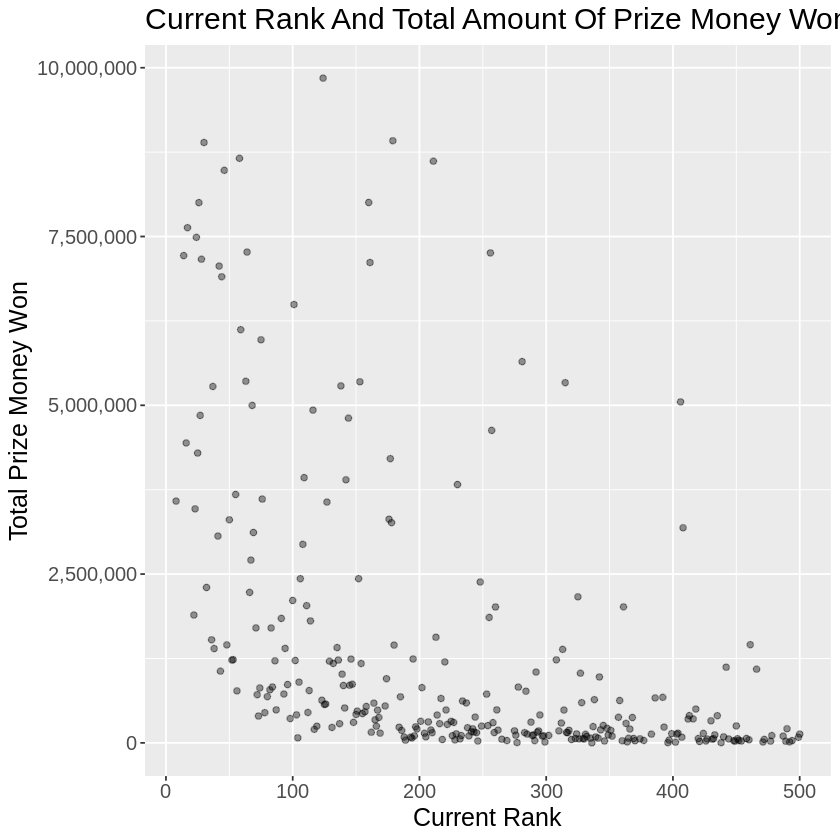

In [92]:
#outliers removed 
tennis_graph <- tennis_train %>%
    filter(Prize.Money < 50000000)

#more outliers removed
tennis_graph_2 <- tennis_train %>%
    filter(Prize.Money < 10000000)
#exploratory analysis graph for Rank vs Prize Money
tennis_explore_rank <- ggplot(tennis_graph_2, aes(x = Current.Rank, y = Prize.Money))+
geom_point(alpha = 0.4)+
labs(x = "Current Rank",
     y = "Total Prize Money Won", 
     title = "Current Rank And Total Amount Of Prize Money Won")+
scale_y_continuous(labels = scales::comma)+
theme(text = element_text(size=15))
tennis_explore_rank

There seems to be a negative linear relationship with Current Rank and Prize Money Won

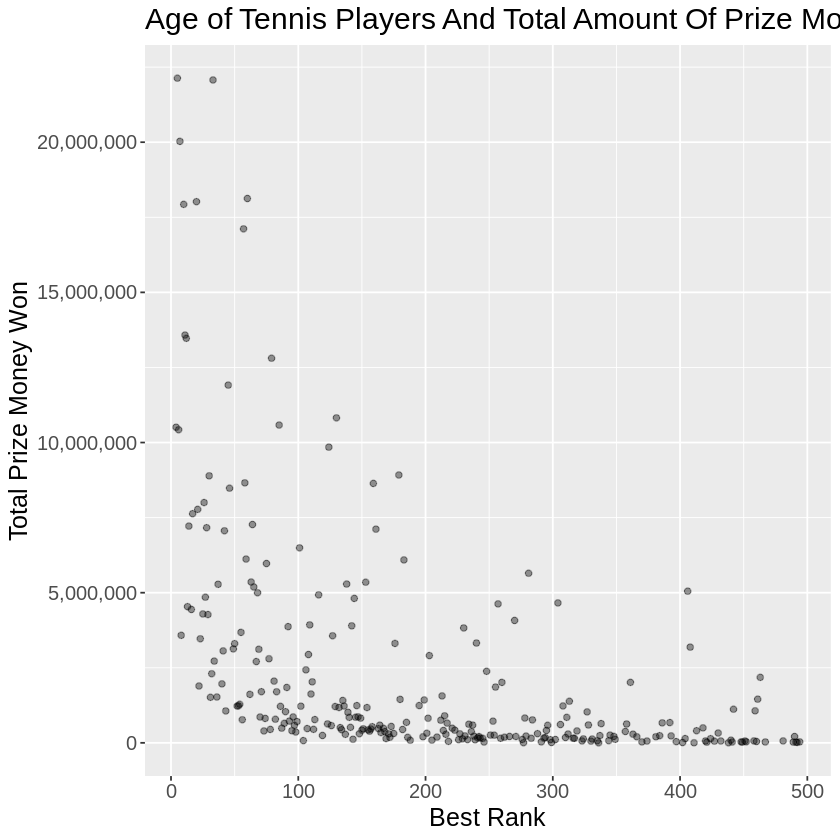

In [108]:

tennis_explore_best_rank <- ggplot(tennis_graph, aes(x = Best.Rank, y = Prize.Money))+
geom_point(alpha = 0.4)+
labs(x = "Best Rank",
     y = "Total Prize Money Won", 
     title = "Age of Tennis Players And Total Amount Of Prize Money Won")+
scale_y_continuous(labels = scales::comma)+
theme(text = element_text(size=15))
tennis_explore_best_rank

In [ ]:
There seems to be the same relationship with best rank as linear rank for prize money won.

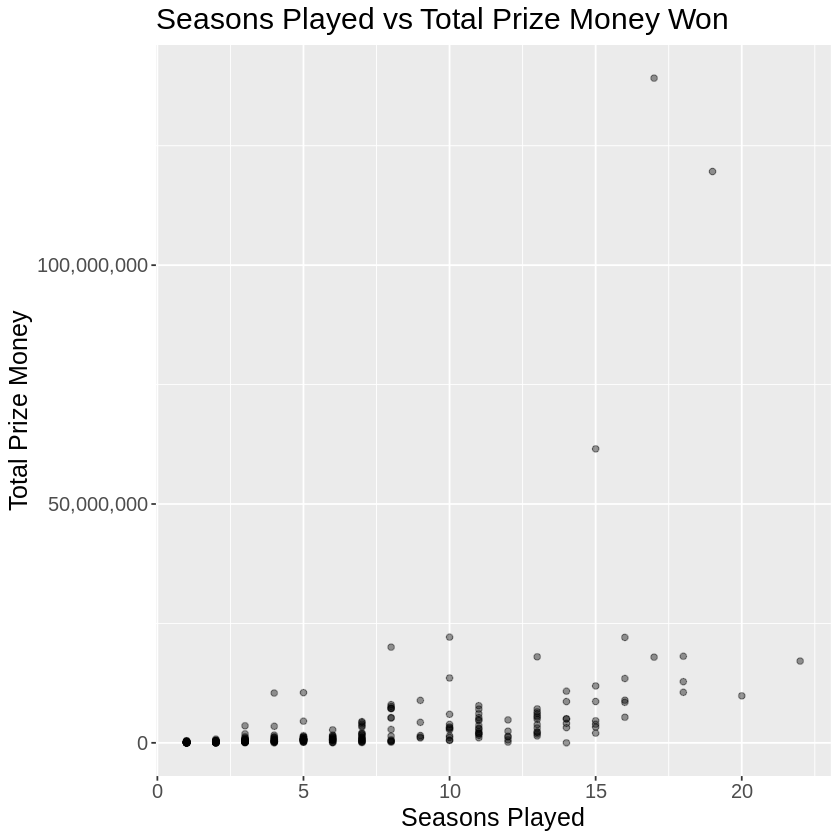

In [115]:
tennis_explore_best_seasonvsrank <- ggplot(tennis_train, aes(x = Seasons, y = Prize.Money))+
geom_point(alpha = 0.4)+
labs(x = "Seasons Played",
     y = "Total Prize Money", 
     title = "Seasons Played vs Total Prize Money Won")+
scale_y_continuous(labels = scales::comma)+
theme(text = element_text(size=15))
tennis_explore_best_seasonvsrank